### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [42]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

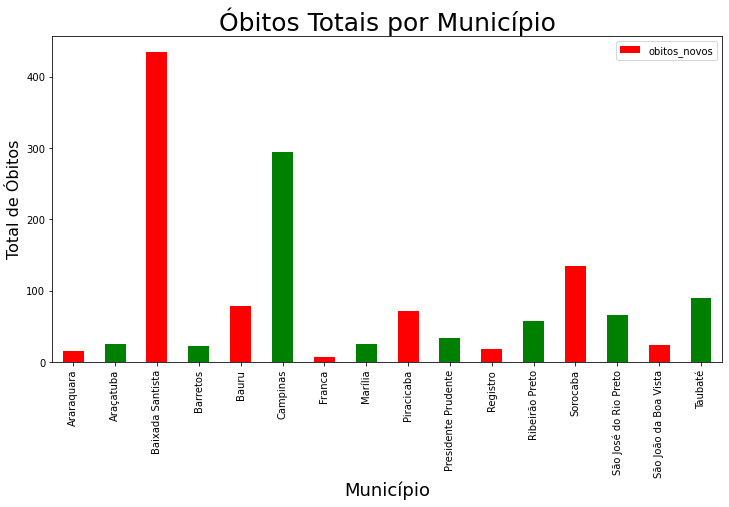

In [40]:
df_agrupado = df2[df2['nome_drs'] != 'Grande São Paulo'].groupby('nome_drs').sum()
ax = df_agrupado.plot(y='obitos_novos', kind='bar', figsize=(12, 6), color=('red', 'green'))

ax.set_title('Óbitos Totais por Município', size=25)
ax.set_ylabel('Total de Óbitos', size=16)
ax.set_xlabel('Município', size=18)
plt.show()

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [46]:
df_agrupado = df2.groupby(['nome_drs', 'ano_mes'], as_index=False).sum()

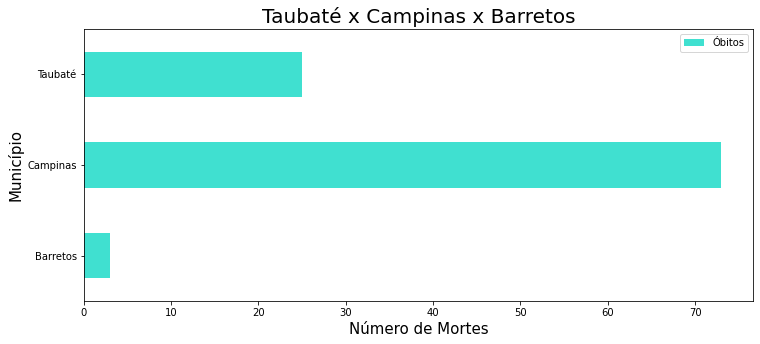

In [77]:
df_abril = df_agrupado[df_agrupado['ano_mes'] == '2020-04']
ax = df_abril[(df_abril['nome_drs'] == 'Campinas')|
         (df_abril['nome_drs'] == 'Barretos')|
         (df_abril['nome_drs'] == 'Taubaté')].plot(kind='barh', x='nome_drs', y='obitos_novos',
                                                   label='Óbitos', color='turquoise', figsize=(12,5))

ax.set_ylabel('Município', size=15)
ax.set_xlabel('Número de Mortes', size=15)
ax.set_title('Taubaté x Campinas x Barretos', size=20)
plt.show()

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

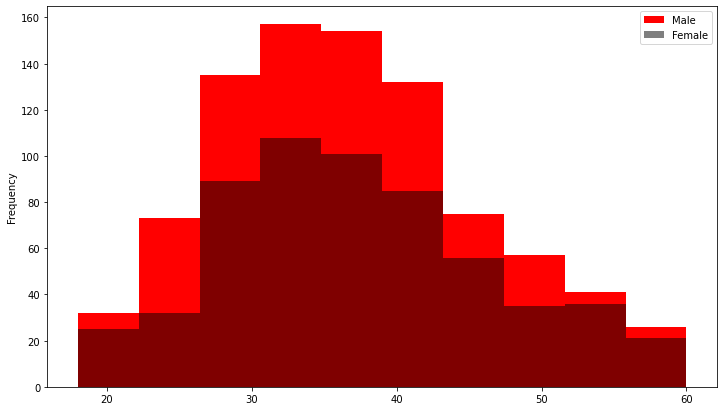

In [116]:
ax = df1[df1['Gender'] == 'Male'].plot(y='Age', kind='hist', bins=10, figsize=(12,7), color='red', label='Male')
ax2= df1[df1['Gender'] == 'Female'].plot(y='Age', kind='hist', bins=10, ax=ax, alpha=.5, color='black', label='Female')


**b)** Faça agora um boxplot das idades, por gênero.

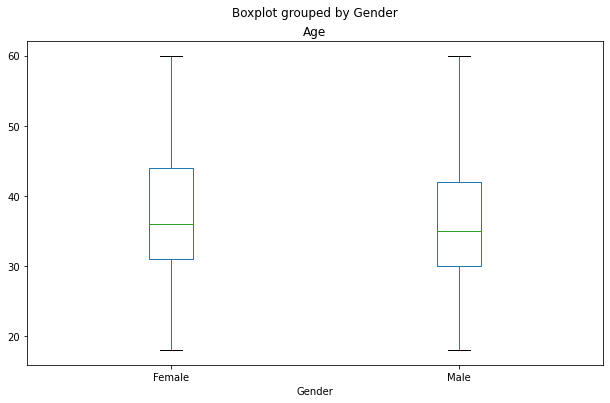

In [133]:
df1.boxplot(column='Age', by='Gender', grid=False, figsize=(10,6))
plt.show()